# 2018 Ford GoBike Data Exploration and Visualization
## by Ahmad Mohsen Hashhash
## Date : 29/12/2020
## Preliminary Wrangling

> Ford GoBike now known as "Bay Wheels" is a regional public bicycle sharing system in California's San Francisco Bay Area.Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. In this dataset, we have the data for the bikes system for the month February 2018 and I will add the remaining months for the same year to make a whole year dataset that we should start doing exploratory analysis for.

In [34]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [35]:
#importing all months files
path = r'C:\Users\Ahmad\Desktop\Communicate Data Findings Project\Data files'
filenames = glob.glob(path + "/*.csv")
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

#saving the master dataset as csv
df.to_csv('master_dataset_2018.csv')

In [36]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(4))

(1863721, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   
2         71576  2018-01-31 14:23:55.8890  2018-02-01 10:16:52.1160   
3         61076  2018-01-31 14:53:23.5620  2018-02-01 07:51:20.5000   

   start_station_id                                 star

In [37]:
#descriptive statistics for the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [38]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [39]:
df.duplicated().sum()

0

In [40]:
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

## Clearning Data

In [41]:
#making a copy of the dataframe
wrangled_df = df.copy()

In [42]:
#I shall change the data types of most of the columns so it fits its description
wrangled_df['start_time'] = pd.to_datetime(wrangled_df['start_time'])
wrangled_df['end_time'] = pd.to_datetime(wrangled_df['end_time'])
wrangled_df['start_station_id'] = wrangled_df['start_station_id'].astype('str')
wrangled_df['end_station_id'] = wrangled_df['end_station_id'].astype('str')
wrangled_df['user_type'] = wrangled_df['user_type'].astype('category')
wrangled_df['member_gender'] = wrangled_df['member_gender'].astype('category')
wrangled_df['bike_id'] = wrangled_df['bike_id'].astype('str')

wrangled_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

In [43]:
# adding new columns that will ease the analysis process
#column for trip duration in mins
wrangled_df['trip_duration'] = wrangled_df['duration_sec']/60

#I shall reformat the start_time column into new columns each specified for month of year, day of week and hour of day
wrangled_df['start_date'] = wrangled_df.start_time.dt.strftime('%Y-%m-%d')
wrangled_df['start_hourofday'] = wrangled_df.start_time.dt.strftime('%H')
wrangled_df['start_dayofweek'] = wrangled_df.start_time.dt.strftime('%A')
wrangled_df['start_month'] = wrangled_df.start_time.dt.strftime('%B')

wrangled_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration,start_date,start_hourofday,start_dayofweek,start_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,1986.0,Male,No,1254.733333,2018-01-31,22,Wednesday,January
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2815,Customer,NaN,NaN,No,1423.700000,2018-01-31,16,Wednesday,January
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,3039,Customer,1996.0,Male,No,1192.933333,2018-01-31,14,Wednesday,January
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,...,321,Customer,NaN,NaN,No,1017.933333,2018-01-31,14,Wednesday,January
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,617,Subscriber,1991.0,Male,No,666.100000,2018-01-31,19,Wednesday,January


In [44]:
wrangled_df['member_birth_year'].value_counts()

1988.0    102836
1987.0     86554
1989.0     84830
1990.0     81999
1985.0     79126
           ...  
1909.0         4
1889.0         3
1906.0         2
1930.0         1
1903.0         1
Name: member_birth_year, Length: 86, dtype: int64

In [45]:
#making a new column for the rider age
wrangled_df['member_age'] = 2021 - wrangled_df['member_birth_year']
wrangled_df['member_age'].value_counts()

33.0     102836
34.0      86554
32.0      84830
31.0      81999
36.0      79126
          ...  
112.0         4
132.0         3
115.0         2
118.0         1
91.0          1
Name: member_age, Length: 86, dtype: int64

In [46]:
#removing any age > 75 considering them as outliers
wrangled_df = wrangled_df.query('member_age < 75')

wrangled_df['member_age'].value_counts()

33.0    102836
34.0     86554
32.0     84830
31.0     81999
36.0     79126
28.0     78702
30.0     77831
35.0     75675
37.0     71470
29.0     69355
38.0     65737
39.0     62665
27.0     62062
26.0     51544
40.0     49865
41.0     48586
42.0     38534
44.0     38293
43.0     36804
25.0     35124
46.0     33680
45.0     29344
47.0     28351
24.0     26744
48.0     24824
50.0     24792
53.0     24021
49.0     22334
56.0     21358
23.0     19827
51.0     18800
52.0     18672
54.0     16633
58.0     14406
22.0     13348
59.0     12626
57.0     12407
55.0     12364
60.0     12071
61.0      9636
62.0      9030
63.0      8057
64.0      5968
21.0      5390
65.0      5261
67.0      4253
69.0      3417
66.0      2757
71.0      2035
68.0      2026
70.0      1782
74.0      1428
72.0      1382
73.0       982
Name: member_age, dtype: int64

In [47]:
wrangled_df['member_age'].mean()

37.754685574142336

In [48]:
#getting the trip distance in kms
from pyproj import Geod
wgs84_geod = Geod(ellps='WGS84')

def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) #Yes, this order is correct
  return dist

#Add/update a column to the data frame with the distances 
wrangled_df['dist'] = Distance(wrangled_df['start_station_latitude'], wrangled_df['start_station_longitude'],\
                      wrangled_df['end_station_latitude'], wrangled_df['end_station_longitude'])
wrangled_df['dist'] = wrangled_df['dist']/1000

In [49]:
#assuring all data types are as we want
wrangled_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
trip_duration                     float64
start_date                         object
start_hourofday                    object
start_dayofweek                    object
start_month                        object
member_age                        float64
dist                              float64
dtype: object

In [50]:
#removing unnecessary columns 
wrangled_df = wrangled_df.drop(columns = (['start_station_latitude', 'start_station_longitude', 'end_station_latitude', \
                                          'end_station_longitude', 'member_birth_year', 'duration_sec']))
wrangled_df.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,trip_duration,start_date,start_hourofday,start_dayofweek,start_month,member_age,dist
0,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,2765,Subscriber,Male,No,1254.733333,2018-01-31,22,Wednesday,January,35.0,2.488001
2,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,296.0,5th St at Virginia St,3039,Customer,Male,No,1192.933333,2018-01-31,14,Wednesday,January,25.0,2.972357
4,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,19.0,Post St at Kearny St,617,Subscriber,Male,No,666.100000,2018-01-31,19,Wednesday,January,30.0,2.443038
6,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),134.0,Valencia St at 24th St,3571,Subscriber,Male,No,7.550000,2018-01-31,23,Wednesday,January,33.0,1.340181
7,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,93.0,4th St at Mission Bay Blvd S,1403,Subscriber,Male,No,3.000000,2018-01-31,23,Wednesday,January,41.0,0.631765


In [51]:
cols = list(wrangled_df.columns.values)
cols

['start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_gender',
 'bike_share_for_all_trip',
 'trip_duration',
 'start_date',
 'start_hourofday',
 'start_dayofweek',
 'start_month',
 'member_age',
 'dist']

In [52]:
#Rearranging the dataset
wrangled_df = wrangled_df[['trip_duration', 'start_time', 'end_time', 'start_station_id', 'start_station_name','end_station_id',\
 'end_station_name', 'dist', 'start_date', 'start_hourofday', 'start_dayofweek', 'start_month', 'bike_id','user_type',\
 'member_gender', 'member_age', 'bike_share_for_all_trip']]

wrangled_df.head()

,trip_duration,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,dist,start_date,start_hourofday,start_dayofweek,start_month,bike_id,user_type,member_gender,member_age,bike_share_for_all_trip
0,1254.733333,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,2.488001,2018-01-31,22,Wednesday,January,2765,Subscriber,Male,35.0,No
2,1192.933333,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,296.0,5th St at Virginia St,2.972357,2018-01-31,14,Wednesday,January,3039,Customer,Male,25.0,No
4,666.100000,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,19.0,Post St at Kearny St,2.443038,2018-01-31,19,Wednesday,January,617,Subscriber,Male,30.0,No
6,7.550000,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),134.0,Valencia St at 24th St,1.340181,2018-01-31,23,Wednesday,January,3571,Subscriber,Male,33.0,No
7,3.000000,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,93.0,4th St at Mission Bay Blvd S,0.631765,2018-01-31,23,Wednesday,January,1403,Subscriber,Male,41.0,No


In [53]:
#Changing Age data type to int
wrangled_df['member_age'] = wrangled_df['member_age'].astype(int)
wrangled_df.dtypes

trip_duration                     float64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
end_station_id                     object
end_station_name                   object
dist                              float64
start_date                         object
start_hourofday                    object
start_dayofweek                    object
start_month                        object
bike_id                            object
user_type                        category
member_gender                    category
member_age                          int32
bike_share_for_all_trip            object
dtype: object

In [54]:
#saving the wrangled_df into .csv file
wrangled_df.to_csv('wrangled_dataset_2018.csv')

In [55]:
wrangled_df.isnull().sum()

trip_duration                  0
start_time                     0
end_time                       0
start_station_id               0
start_station_name         11440
end_station_id                 0
end_station_name           11440
dist                           0
start_date                     0
start_hourofday                0
start_dayofweek                0
start_month                    0
bike_id                        0
user_type                      0
member_gender                  0
member_age                     0
bike_share_for_all_trip        0
dtype: int64

### What is the structure of your dataset?

> There are 1747598 rows in the dataset and 17 columns each represents a specific property for every trip most of them are numeric in nature, here are what these properties stands for:
-Trip Duration : how long the trip took in minutes
-start time and end time : date time datatypes repsenting the time of starting and ending the trip
-start and end station id, bike id : a numebr specific to each unique station and bike
-dist : distance of the trip in kilometers 
-There are some other columns that eases the analysis like (start hourofday, dayofweek, start month, member gender and age)

### What is/are the main feature(s) of interest in your dataset?

> Main features of interest are:

>> Most popular hours and days for using the bikes

>> Age of majority of the members and their gender

>> Average trips duration

>> whether the bikes are being used more by subscribers or customers 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features that will support my investigation are:

>>Start Time

>> Age

>> Gender

>> Distance


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Monthly Bike Trips Count

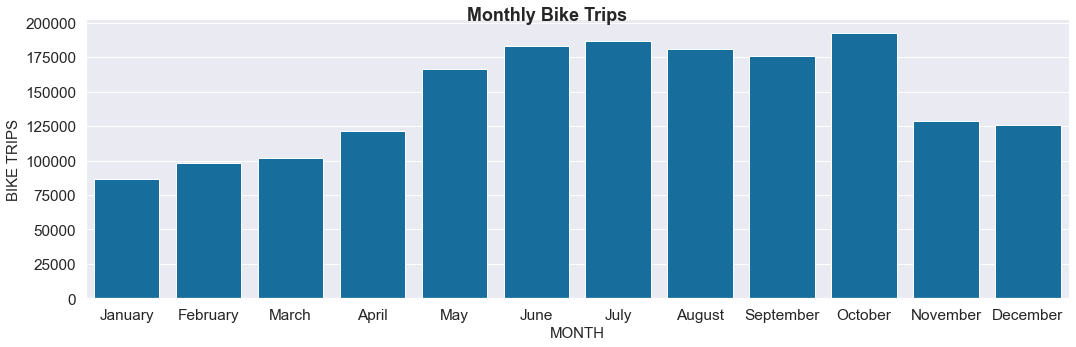

In [74]:
#Distribution of number of bike trips over months
clr = sb.color_palette('colorblind')[0];
trips_month = sb.catplot(data = wrangled_df, x='start_month', kind='count', color = clr, aspect = 3);
plt.xlabel("MONTH",  fontsize = 15);
plt.ylabel("BIKE TRIPS", fontsize = 15);
trips_month.fig.suptitle('Monthly Bike Trips', fontsize=18, fontweight='bold');

As we can see, highest number of trips occurs in summer months with a peak in october then reachs it lowest points in winter and start increasing during spring

### Daily Bike Trips Count

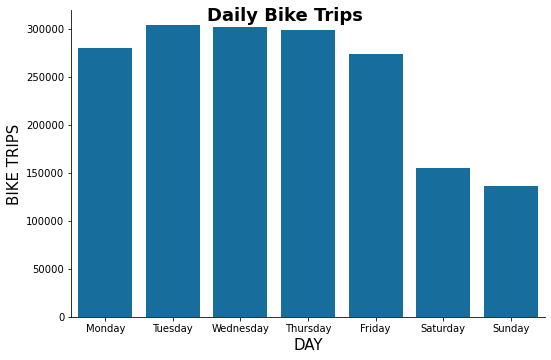

In [57]:
#most popular day of the week for bike trips
clr = sb.color_palette('colorblind')[0]
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_day = sb.catplot(data = wrangled_df, x='start_dayofweek',order = days_order,\
                        kind='count', color = clr, aspect = 1.5);
plt.xlabel("DAY",  fontsize = 15);
plt.ylabel("BIKE TRIPS", fontsize = 15);
trips_day.fig.suptitle('Daily Bike Trips', fontsize=18, fontweight='bold');

Most popular days of the week are working days, while weekends have lower number of trips

### Hourly Bike Trips Count

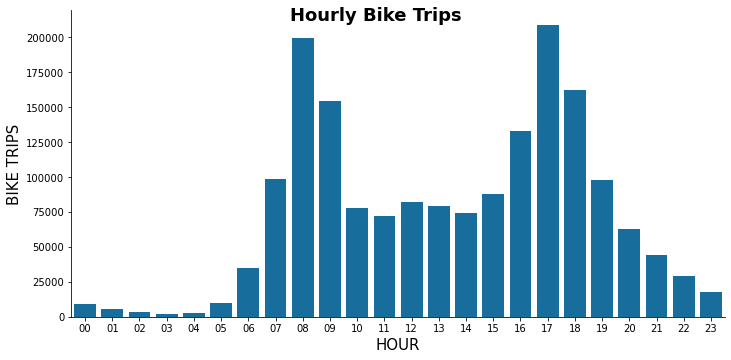

In [58]:
#most popular hour of day for bike trips
clr = sb.color_palette('colorblind')[0]
trips_hour = sb.catplot(data = wrangled_df, x='start_hourofday', kind='count', color = clr, aspect = 2);
plt.xlabel("HOUR",  fontsize = 15);
plt.ylabel("BIKE TRIPS", fontsize = 15);
trips_hour.fig.suptitle('Hourly Bike Trips', fontsize=18, fontweight='bold');


Pretty accurate!!, from the plot above we can notice that the hours where peaks occur are while going to work and return from it with some fluctuations in between these hours and decreasing in the evening

### Trips Count for Members Age

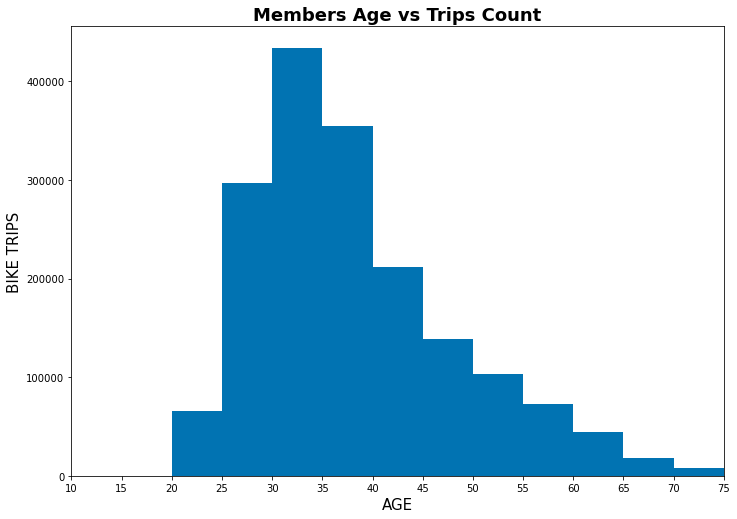

In [59]:
#most popular age of members
plt.figure(figsize=[ 11.69, 8.27]);
bins = np.arange(0, wrangled_df['member_age'].max()+5, 5)
clr = sb.color_palette('colorblind')[0]
plt.hist(data=wrangled_df, x = 'member_age', bins = bins, color = clr)
plt.xticks(bins, bins)
plt.xlabel('AGE', fontsize = 15);
plt.ylabel('BIKE TRIPS', fontsize = 15);
plt.title('Members Age vs Trips Count', fontsize=18, fontweight='bold' );
plt.xlim([10, 75]);

The most popular age of our customers and members is from 25 to 40 years old and as the age increases the bike trips get lower which means usage is less

In [60]:
#Describing the count of gender as percentage
gender = wrangled_df.groupby('member_gender').agg({'bike_id':'count'})
gender['percentage'] = (gender['bike_id']/gender['bike_id'].sum())*100

### Percentage of Members Gender

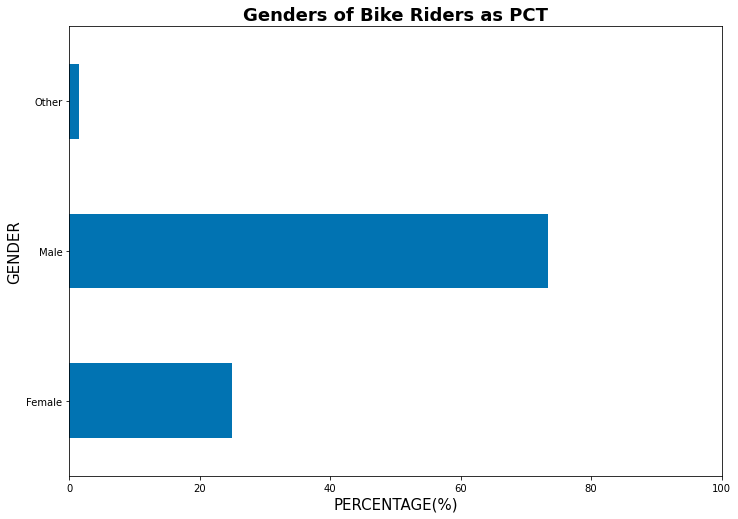

In [61]:
plt.figure(figsize=[ 11.69, 8.27]);
clr = sb.color_palette('colorblind')[0]
gender['percentage'].plot(kind = 'barh', color = clr);
plt.title('Genders of Bike Riders as PCT',  fontsize=18, fontweight='bold')
plt.ylabel('GENDER', fontsize=15)
plt.xlabel('PERCENTAGE(%)', fontsize=15)
plt.xlim([0, 100]);

As we can see, most of the riders are male

### Trips Duration

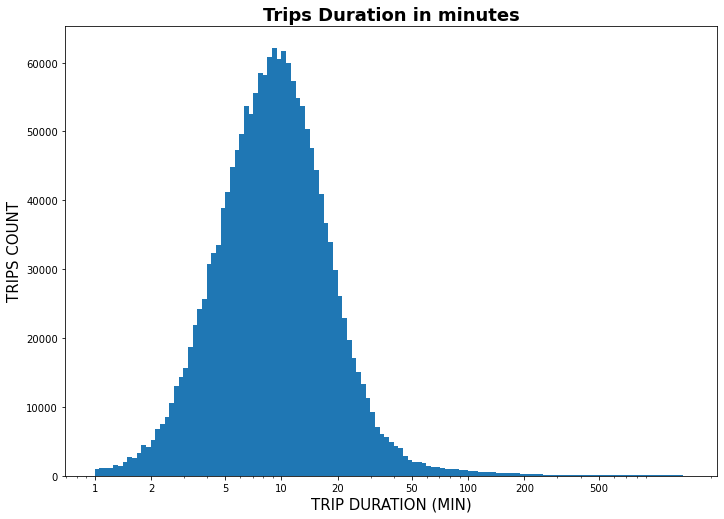

In [62]:
#Trip duration in minutes
plt.figure(figsize=[ 11.69, 8.27]);
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(wrangled_df['trip_duration'].max())+log_binsize, log_binsize)
plt.hist(data = wrangled_df, x = 'trip_duration', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500], [1, 2, 5, 10, 20, 50, 100, 200, 500]);
plt.xlabel('TRIP DURATION (MIN)', fontsize=15);
plt.ylabel('TRIPS COUNT', fontsize=15)
plt.title('Trips Duration in minutes', fontsize=18, fontweight='bold');

Most of the trips are between 2 minutes and 30 minutes long

### Users Type Count

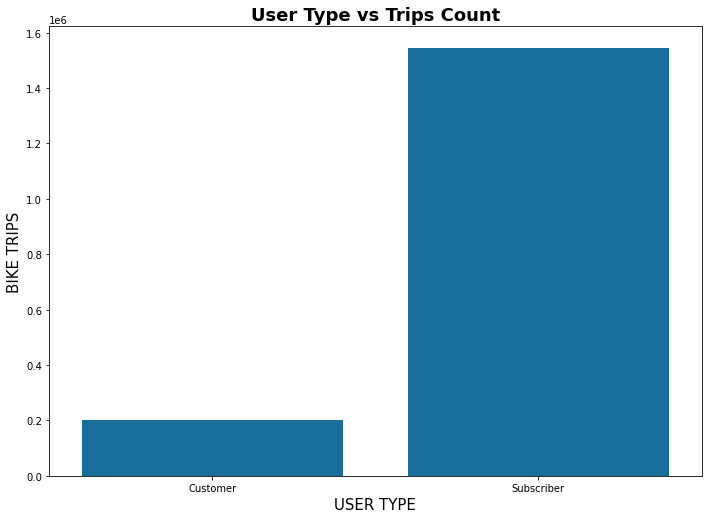

In [63]:
plt.figure(figsize=[ 11.69, 8.27]);
clr = sb.color_palette('colorblind')[0]
sb.countplot(data=wrangled_df, x='user_type', color=clr);
plt.xlabel('USER TYPE', fontsize=15)
plt.ylabel('BIKE TRIPS', fontsize=15)
plt.title('User Type vs Trips Count', fontsize=18, fontweight='bold');

Subscribers are using the service way much more than casual riders

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

As we saw from the plots related to trips count distribution over time (Hour-Day-Month) we figured out that the peak of trips count is between (6-9) and (17-19) and during all work day are in high demand and low demand in weekends also we noticed that the number of trips increases the most during the year starting from spring when it reaches its peak in october then goes down again in winter

Also the member age who do trips the most varies between 25 to 40 years old

We managed to see male domination in using the bikes with 73% while it was way much less in females at 23% and other genders.

Eventually, we saw that the majority of the bike trips take from 5 minutes to 20 minutes

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were indeed unusual distributions espicially in trips duiration vs trips count which I had to plot it on log scale so I manage to see the difference in details

Also I had to extract the member age by subtracting the birth year from the current year to get the direct age which will be more benficial in the analysis process

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Relation between Trip Duration and Member Gender

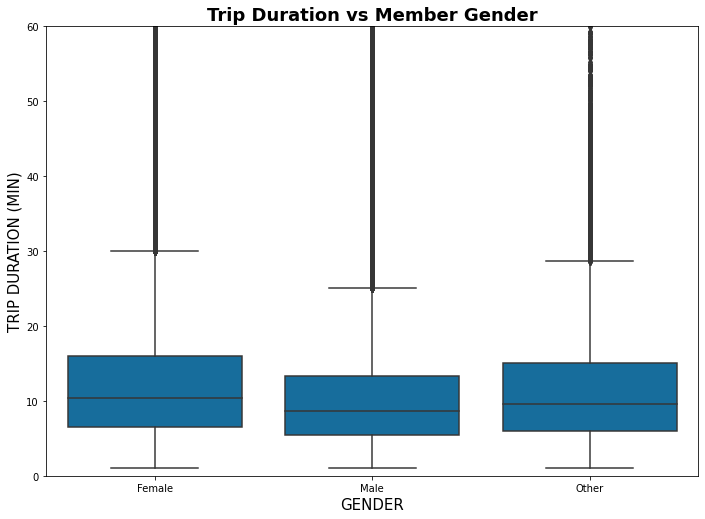

In [64]:
#drawing a box plot for relation between trip duration and member age
plt.figure(figsize=[ 11.69, 8.27]);
clr = sb.color_palette('colorblind')[0]
sb.boxplot(data=wrangled_df, x='member_gender', y='trip_duration', color=clr);
plt.xlabel('GENDER',  fontsize=15);
plt.ylabel('TRIP DURATION (MIN)', fontsize=15);
plt.title('Trip Duration vs Member Gender',  fontsize=18, fontweight='bold')
plt.ylim([0, 60]);

Seems like females are having a longer duration trips in comparison with males and other genders, that was noticed by the higher median and longer IQR for females

### Relation between Trip Distance and Member Gender

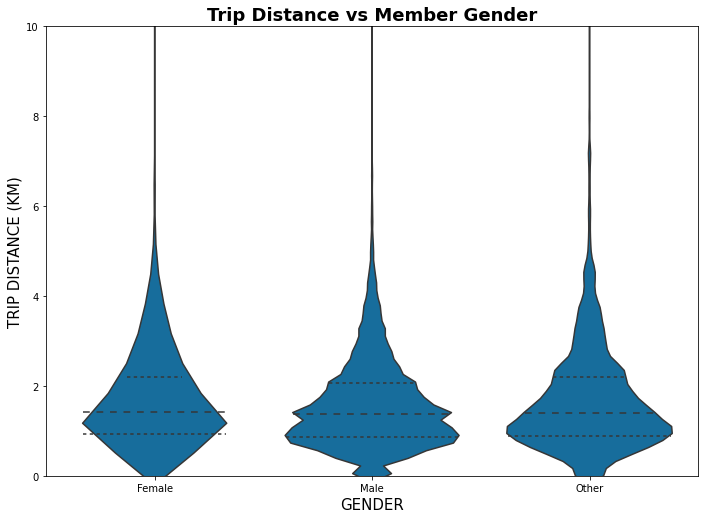

In [65]:
#drawing a violin plot for relation between trip duration and member gender
plt.figure(figsize=[ 11.69, 8.27]);
sb.violinplot(data=wrangled_df, x='member_gender', y='dist', color=clr, inner = 'quartile');
plt.xlabel('GENDER',fontsize=15 );
plt.ylabel('TRIP DISTANCE (KM)', fontsize=15);
plt.title('Trip Distance vs Member Gender',  fontsize=18, fontweight='bold')
plt.ylim([0, 10]);

There is almost similarity between genders in relation with trip distance

### Relation between Member Age and Trip Duration

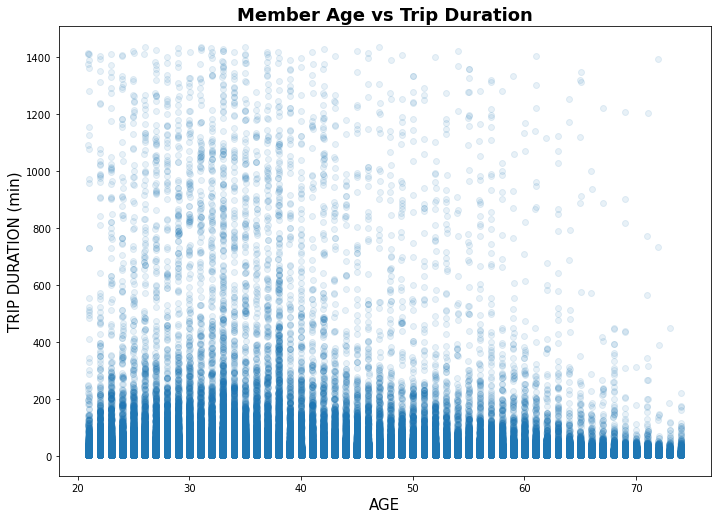

In [66]:
#Scatter Plot between the Member age and Trip duration 
plt.figure(figsize=[ 11.69, 8.27]);
sb.regplot(data = wrangled_df, x = 'member_age', y = 'trip_duration', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('AGE', fontsize=15)
plt.ylabel('TRIP DURATION (min)', fontsize=15);
plt.title('Member Age vs Trip Duration',  fontsize=18, fontweight='bold');

As we see the relation between the member age and trip duration is negatively correlated as when age increases the trip distance decreases

### User Type trips count during weekdays 

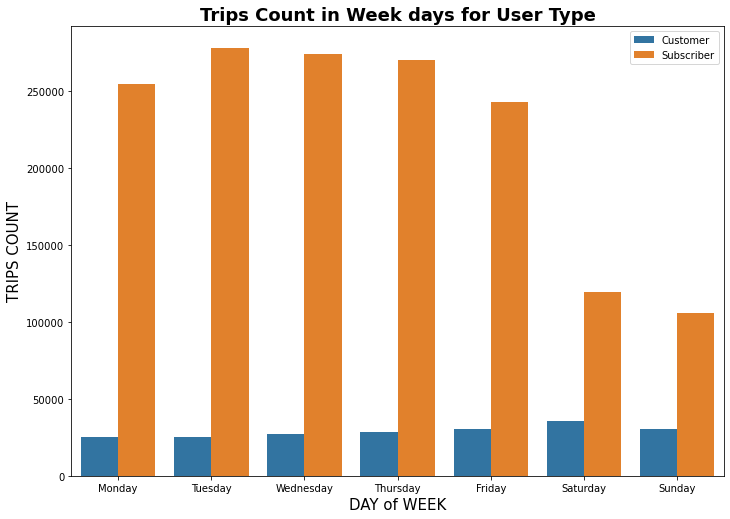

In [67]:
#clustered bar chart for relation between user type and start day of week
plt.figure(figsize=[ 11.69, 8.27]);
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=wrangled_df, x='start_dayofweek', hue='user_type', order = days_order);
plt.xlabel('DAY of WEEK',  fontsize = 15);
plt.ylabel('TRIPS COUNT',  fontsize = 15);
plt.legend(['Customer', 'Subscriber'])
plt.title('Trips Count in Week days for User Type',  fontsize=18, fontweight='bold');

Bike usage between Customers and Subscriber during week is huge, while we notice an increment in customers bike usage during weekends than weekdays which indicates that they use the bikes for wandering around the city or for fun while subscriber tend to use it during weekdays more

### Relation between Trip Duration and User type

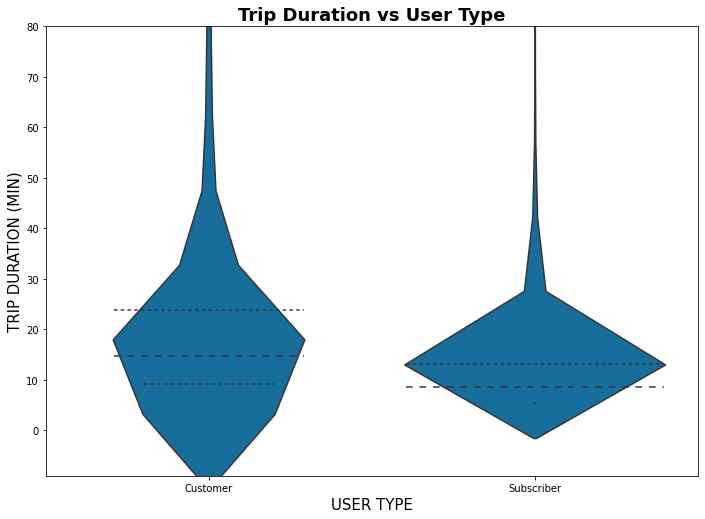

In [68]:
#drawing a violin plot for relation between trip duration and user type
plt.figure(figsize=[ 11.69, 8.27]);
sb.violinplot(data=wrangled_df, x='user_type', y='trip_duration', color=clr, inner = 'quartile');
plt.xlabel('USER TYPE',  fontsize=15);
plt.ylabel('TRIP DURATION (MIN)',  fontsize=15);
plt.title('Trip Duration vs User Type',  fontsize=18, fontweight='bold')
plt.ylim([-9, 80]);

Trip duration plot for subscribers is so flat around 10 minutes trips which might indicate that most of the subscribers take the bike for a specific errand while it's narrower for Customers which indicates that they rent the bike for longer durations

### Relation between Member Age and Trip Distance

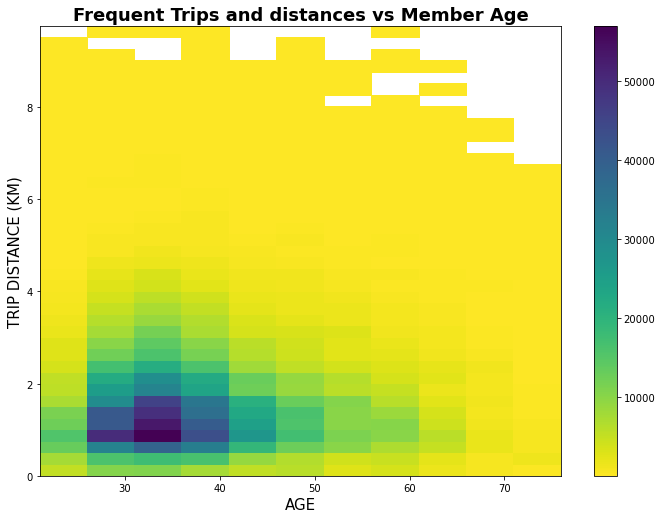

In [69]:
#heat map between member age and trip distance
plt.figure(figsize=[ 11.69, 8.27]);
xbin = np.arange(wrangled_df['member_age'].min(), wrangled_df['member_age'].max()+5, 5)
ybin = np.arange(0, 10, 0.25)
plt.hist2d(data = wrangled_df,x = 'member_age',y='dist',cmin=0.5,cmap = 'viridis_r',bins=[xbin, ybin]);
plt.colorbar();
plt.xlabel('AGE',  fontsize=15)
plt.ylabel('TRIP DISTANCE (KM)',  fontsize=15)
plt.title('Frequent Trips and distances vs Member Age',  fontsize=18, fontweight='bold');

As we can see ages betwwen 30 - 40 usually have longer trips than elder ages

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Females are having longer trip duration than males and other genders.
> There is no difference about trip distance between genders
> There is an obvious negative correlation between trip distance and member age
> Subscribers use bikes in weekdays more than weekends while the opposite happens with customers
> Subscribers trip durations are kinda fixed around 10-20 minutes while customers tend to use it more up to even 35 minutes
> Younger members tend to have longer distance trips in comparison with elder members

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship that customers use the bikes in weekends more than weekdays, also that females usually take longer trips than other genders

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Trip Duration during weekdays between different member genders

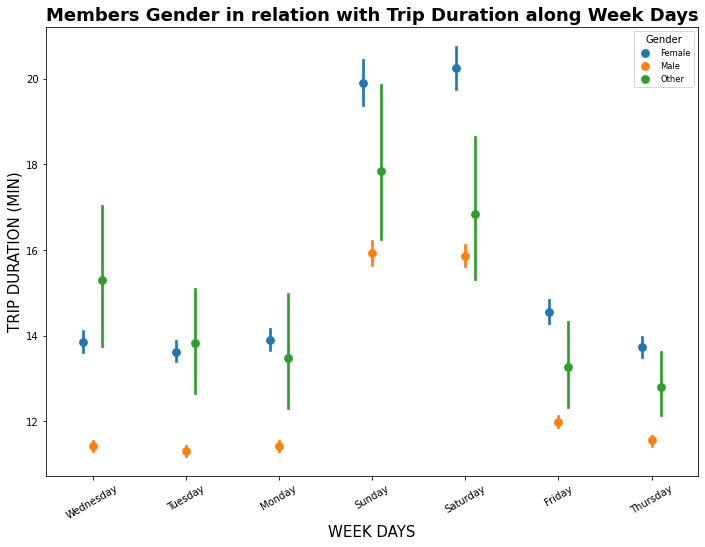

In [70]:
#point plot for variation of trip duration during week between different member genders
plt.figure(figsize=[ 11.69, 8.27]);
sb.pointplot(data=wrangled_df, x='start_dayofweek', y='trip_duration', hue='member_gender', dodge = 0.2, linestyles="");
plt.xlabel('WEEK DAYS',  fontsize=15);
plt.legend(title="Gender", fontsize='small')
plt.xticks(rotation = 30)
plt.ylabel('TRIP DURATION (MIN)',  fontsize=15);
plt.title('Members Gender in relation with Trip Duration along Week Days',  fontsize=18, fontweight='bold');

As we can see, males usually having shorter trips duration than females and ther gender all weekdays, while other genders having the longer trips duration on Tuesday and Wednesday and for the remaining days there is female domination related to trip duration along week

### Faceting of Member Gender and Age vs Trip Distance

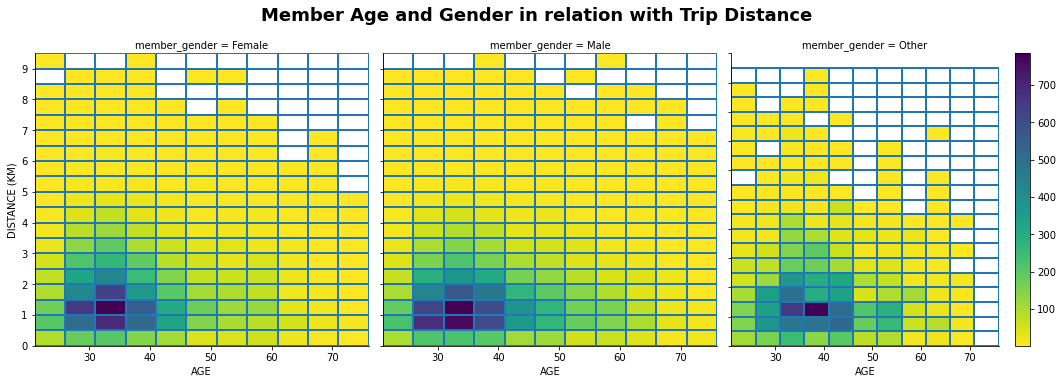

In [71]:
#faceting of member gender and age vs trip distance
xbin = np.arange(wrangled_df['member_age'].min(), wrangled_df['member_age'].max()+5, 5)
ybin = np.arange(0, 10, 0.5)
# #taking a sample from the main df
df_temp = wrangled_df.sample(800000, random_state=42)
g = sb.FacetGrid(data = df_temp, col = 'member_gender',height=5)
g.map(plt.hist2d, 'member_age','dist',cmin=0.5,cmap = 'viridis_r',bins=[xbin, ybin]);
plt.colorbar();
g.set_axis_labels('AGE', 'DISTANCE (KM)')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);
g.fig.suptitle('Member Age and Gender in relation with Trip Distance', fontsize=18, fontweight='bold', y =1.06);

Seems like males have a wider age variance with trips distances between 0.5 - 1.5 kms, while other genders users are of ages between 35-40 year old with stable 1 - 1.5 kms trips

### Relation between User Type and trips count during day hours

<Figure size 841.68x595.44 with 0 Axes>

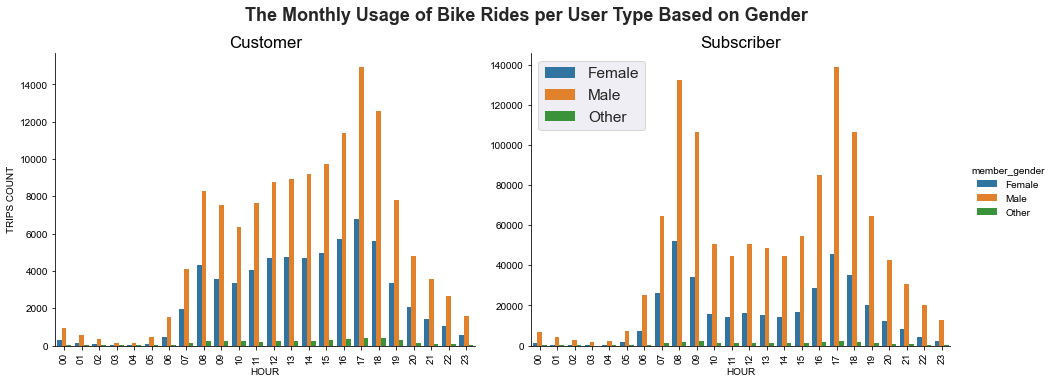

In [72]:
#Count plot for relation between user type and trips count during day hours
plt.figure(figsize=[ 11.69, 8.27]);
g = sb.catplot(data=wrangled_df, x='start_hourofday', col="user_type", hue='member_gender', kind='count', aspect=20/15,
                 sharey=False)
sb.set(font_scale = 1.4)
plt.legend(['Female', 'Male', 'Other'])
g.set_axis_labels('HOUR', 'TRIPS COUNT')
g.set_xticklabels(rotation=90)
g.set_titles('{col_name}')
g.fig.suptitle('The Monthly Usage of Bike Rides per User Type Based on Gender', fontsize=18, fontweight='bold', y =1.06);

In the chart we can see that males do the most number of trips almost every hour o the day followed by females then other genders

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Using multivariate exploration certainly strengthened the features like males having way much more number of trips in comparisin with other genders along the day hours, alse the notice where males use the bike for more distances than other genders along the age range

### Were there any interesting or surprising interactions between features?

> The surprising interaction that really made me so interested is that females usually having longer trip duration than other genders